In [ ]:
import pandas as pd

In [ ]:
demand = pd.read_csv('ops_demand.csv')

In [ ]:
demand.rename({'Trading Interval': 'Time', 'Operational Demand (MW)': 'Megawatthours'}, axis=1, inplace=True)

In [ ]:
hourly_demand = demand[demand['Time'].str.contains('00:00$')]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
plt.style.use('seaborn-darkgrid')

In [ ]:
hourly_demand.head()

,Time,Megawatthours
0,2009-01-01 08:00:00,1726.886
2,2009-01-01 09:00:00,1844.660
4,2009-01-01 10:00:00,1957.610
6,2009-01-01 11:00:00,2107.300
8,2009-01-01 12:00:00,2232.216


In [ ]:
def drop_secs(string):
    return string[:-3]

In [ ]:
hourly_demand['Time']=hourly_demand['Time'].apply(lambda x:drop_secs(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
hourly_demand['Time']= pd.to_datetime(hourly_demand['Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
hourly_demand.sort_values(by='Time', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
hourly_demand.head()
hourly_demand.reset_index(inplace=True, drop=True)

In [ ]:
national_demand= hourly_demand

In [ ]:
national_demand['Year'] = national_demand['Time'].dt.year
national_demand['Month'] = national_demand['Time'].dt.month
national_demand['Hour'] = national_demand['Time'].dt.hour
national_demand['Day_of_week'] = national_demand['Time'].dt.dayofweek
national_demand['Day_of_month'] = national_demand['Time'].dt.day
national_demand['Day_of_year'] = national_demand['Time'].dt.dayofyear
national_demand['Week_of_year'] = national_demand['Time'].dt.isocalendar().week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
national_demand.set_index('Time', inplace=True, drop=True)

In [ ]:
national_demand.head(10)

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year,Week_of_year
Time,,,,,,,,
2006-09-20 00:00:00,1347.418,2006,9,0,2,20,263,38
2006-09-20 01:00:00,1298.644,2006,9,1,2,20,263,38
2006-09-20 02:00:00,1282.006,2006,9,2,2,20,263,38
2006-09-20 03:00:00,1281.608,2006,9,3,2,20,263,38
2006-09-20 04:00:00,1298.834,2006,9,4,2,20,263,38
2006-09-20 05:00:00,1406.872,2006,9,5,2,20,263,38
2006-09-20 06:00:00,1654.192,2006,9,6,2,20,263,38
2006-09-20 07:00:00,1959.276,2006,9,7,2,20,263,38
2006-09-20 08:00:00,2017.874,2006,9,8,2,20,263,38


In [ ]:
mwh = pd.Series(national_demand['Megawatthours'])
mwh

Time
2006-09-20 00:00:00    1347.418
2006-09-20 01:00:00    1298.644
2006-09-20 02:00:00    1282.006
2006-09-20 03:00:00    1281.608
2006-09-20 04:00:00    1298.834
                         ...   
2022-08-15 03:00:00    1797.656
2022-08-15 04:00:00    1817.958
2022-08-15 05:00:00    1968.344
2022-08-15 06:00:00    2265.182
2022-08-15 07:00:00    2575.118
Name: Megawatthours, Length: 139400, dtype: float64

In [ ]:
annual_means = mwh.resample('Y').mean()
annual_means

Time
2006-12-31    1753.686514
2007-12-31    1827.240854
2008-12-31    1881.472931
2009-12-31    1921.116313
2010-12-31    2001.333183
2011-12-31    2026.578032
2012-12-31    2049.512450
2013-12-31    2074.674601
2014-12-31    2109.773761
2015-12-31    2104.631465
2016-12-31    2130.739552
2017-12-31    2062.704403
2018-12-31    2013.230175
2019-12-31    2002.892514
2020-12-31    1971.601819
2021-12-31    2010.800055
2022-12-31    2133.437872
Freq: A-DEC, Name: Megawatthours, dtype: float64

In [ ]:
quarterly_means = mwh.resample('Q-JUL').mean()
quarterly_means

Time
2006-10-31    1668.890171
2007-01-31    1828.702472
2007-04-30    1864.894844
2007-07-31    1823.845958
2007-10-31    1784.060127
                 ...     
2021-10-31    1882.747030
2022-01-31    2022.138518
2022-04-30    2120.936592
2022-07-31    2084.161197
2022-10-31    2269.860448
Freq: Q-JUL, Name: Megawatthours, Length: 65, dtype: float64

In [ ]:
def plot_timeseries(ax, series, title=None, label=None):
    ax.plot(series, label=label)
    ax.set_title(title)

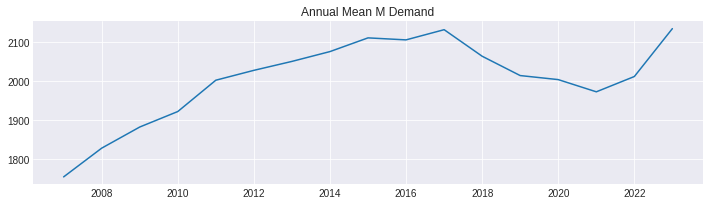

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, annual_means, 'Annual Mean M Demand')
plt.show()

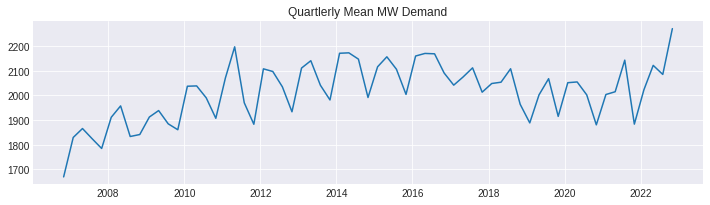

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, quarterly_means, 'Quartlerly Mean MW Demand')
plt.show()

In [ ]:
weekly_means = mwh.resample('W').mean()

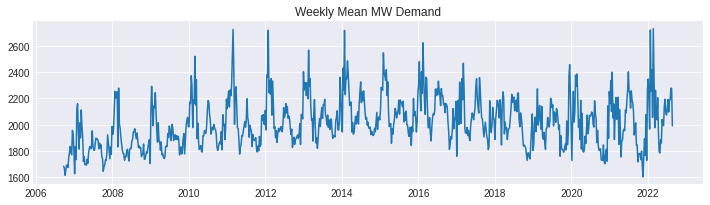

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
plot_timeseries(ax, weekly_means, 'Weekly Mean MW Demand')
plt.show()

In [ ]:
daily_means = mwh.resample('D').mean()

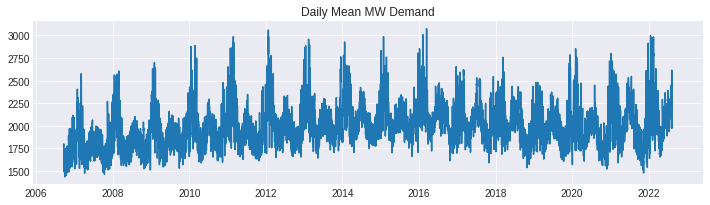

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, daily_means, 'Daily Mean MW Demand')
plt.show()

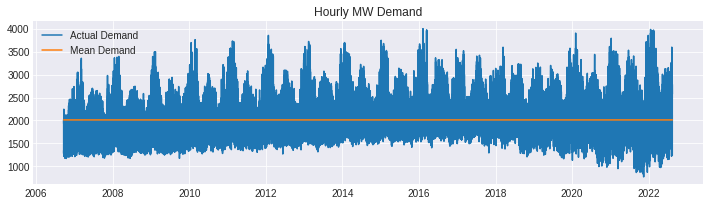

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh, 'Hourly MW Demand', 'Actual Demand')
ax.plot(mwh.index, [np.mean(mwh)]*len(mwh), label='Mean Demand')
ax.legend()
plt.show()

In [ ]:
mwh_2022 = mwh.loc['2020-01-01 00:00:00':'2020-12-31 23:00:00']
mwh_2022

Time
2020-01-01 00:00:00    1824.928
2020-01-01 01:00:00    1769.926
2020-01-01 02:00:00    1729.382
2020-01-01 03:00:00    1696.226
2020-01-01 04:00:00    1684.694
                         ...   
2020-12-31 19:00:00    2838.190
2020-12-31 20:00:00    2747.442
2020-12-31 21:00:00    2570.748
2020-12-31 22:00:00    2425.670
2020-12-31 23:00:00    2290.426
Name: Megawatthours, Length: 8784, dtype: float64

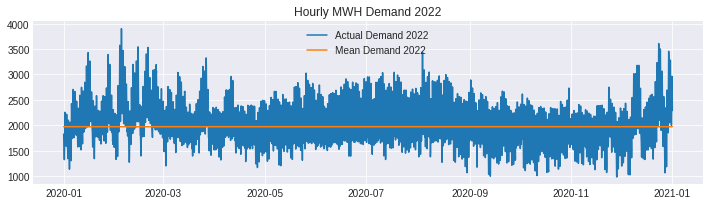

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh_2022, 'Hourly MWH Demand 2022', 'Actual Demand 2022')
ax.plot(mwh_2022.index, [np.mean(mwh_2022)]*len(mwh_2022), label='Mean Demand 2022')
ax.legend()
plt.show()

In [ ]:
mwh_2022_2021_summer = mwh.loc['2021-12-01 00:00:00':'2022-03-31 23:00:00']
mwh_2022_2021_summer


Time
2021-12-01 00:00:00    1788.716
2021-12-01 01:00:00    1756.662
2021-12-01 02:00:00    1724.418
2021-12-01 03:00:00    1731.682
2021-12-01 04:00:00    1757.248
                         ...   
2022-03-31 19:00:00    2957.242
2022-03-31 20:00:00    2797.330
2022-03-31 21:00:00    2601.004
2022-03-31 22:00:00    2418.866
2022-03-31 23:00:00    2245.612
Name: Megawatthours, Length: 2904, dtype: float64

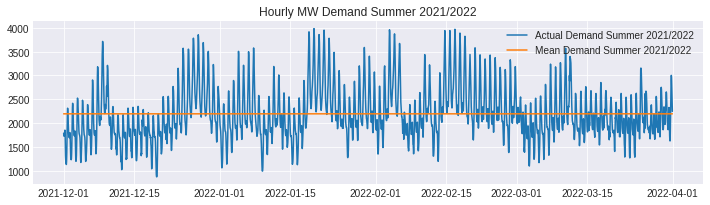

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh_2022_2021_summer, 'Hourly MW Demand Summer 2021/2022', 'Actual Demand Summer 2021/2022')
ax.plot(mwh_2022_2021_summer.index, [np.mean(mwh_2022_2021_summer)]*len(mwh_2022_2021_summer), label='Mean Demand Summer 2021/2022')
ax.legend()
plt.show()

In [ ]:
mw_by_hour = pd.Series(national_demand.groupby('Hour').mean('Megawatthours')['Megawatthours'])
mw_by_hour

Hour
0     1711.613804
1     1643.116957
2     1610.733467
3     1598.893293
4     1613.720114
5     1690.408276
6     1857.825860
7     2049.480022
8     2107.021555
9     2083.030861
10    2037.928726
11    2019.424736
12    2021.386986
13    2039.046850
14    2079.009098
15    2140.669071
16    2244.390500
17    2371.685571
18    2493.158353
19    2466.835269
20    2367.515806
21    2210.829801
22    2014.527702
23    1832.240800
Name: Megawatthours, dtype: float64

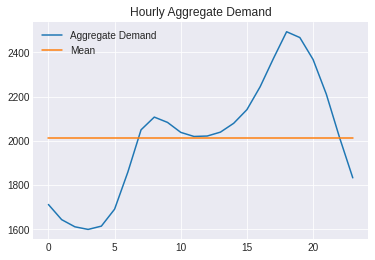

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_timeseries(ax, mw_by_hour, 'Hourly Aggregate Demand', 'Aggregate Demand')
ax.plot(mw_by_hour.index, [np.mean(mw_by_hour)]*len(mw_by_hour), label='Mean')
ax.legend()
plt.show()

In [ ]:

def plot_agg_demand(ax, df, col, title=None):
    agg_dem = pd.Series(df.groupby(col).mean('Megawatthours')['Megawatthours'])
    plot_timeseries(ax, agg_dem, title, 'Aggregate Demand')
    ax.plot(agg_dem.index, [np.mean(agg_dem)]*len(agg_dem), label='Mean')

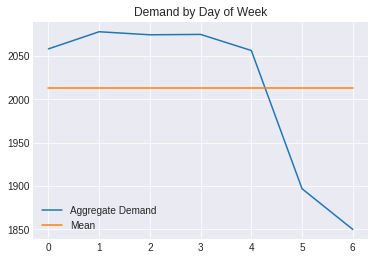

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Day_of_week', 'Demand by Day of Week')
ax.legend()
plt.show()

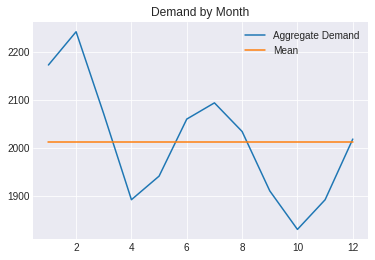

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Month', 'Demand by Month')
ax.legend()
plt.show()

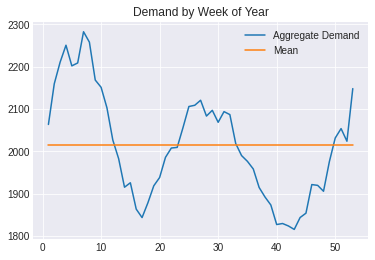

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Week_of_year', 'Demand by Week of Year')
ax.legend()
plt.show()

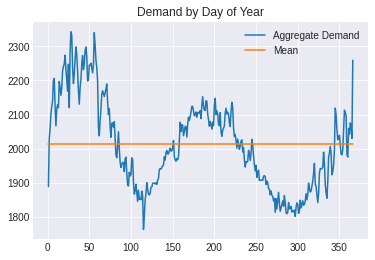

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Day_of_year', 'Demand by Day of Year')
ax.legend()
plt.show()

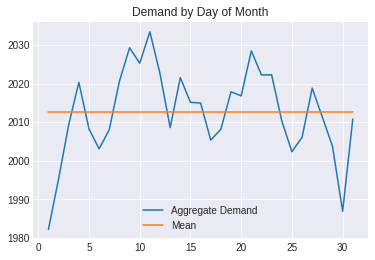

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, national_demand, 'Day_of_month', 'Demand by Day of Month')
ax.legend()
plt.show()

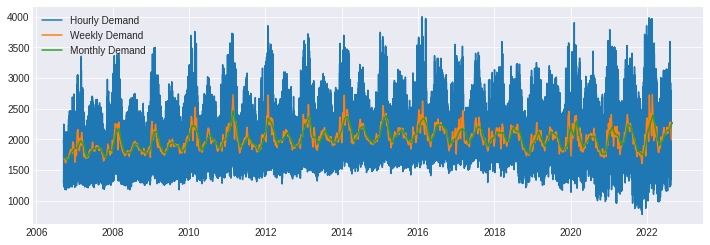

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, mwh, None, 'Hourly Demand')
plot_timeseries(ax, mwh.resample('W').mean(), None, 'Weekly Demand')
plot_timeseries(ax, mwh.resample('M').mean(), None, 'Monthly Demand')
ax.legend()
plt.show()